<a href="https://colab.research.google.com/github/hanajiffry99/Employee_Leave_Prediction_NN/blob/main/ANN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [33]:
## Uploading the dataset
from google.colab import files
data_load = files.upload()

Saving Employee.csv to Employee (2).csv


In [34]:
##Reading and observing the dataset
Employee_data = pd.read_csv('Employee.csv')
Employee_data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [35]:
Employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [36]:
#checking for missing values
Employee_data.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [37]:
# Check for duplicate rows
Employee_data.duplicated().sum()

1889

In [38]:
#removing duplicates
Employee_data = Employee_data.drop_duplicates()
Employee_data.shape

(2764, 9)

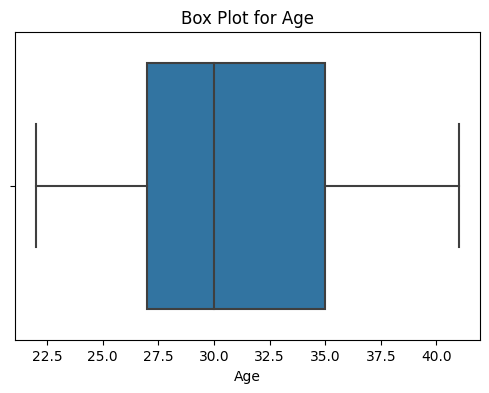

In [39]:
#Checking for outliers for age feature
plt.figure(figsize=(6,4))
sns.boxplot(x=Employee_data['Age'])
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.show()

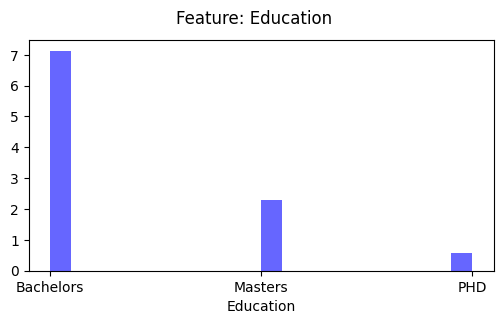

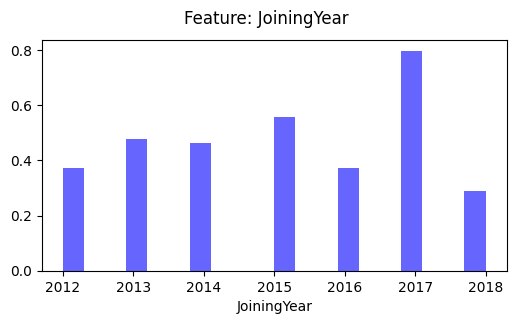

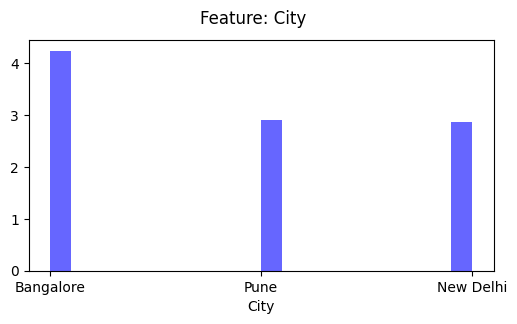

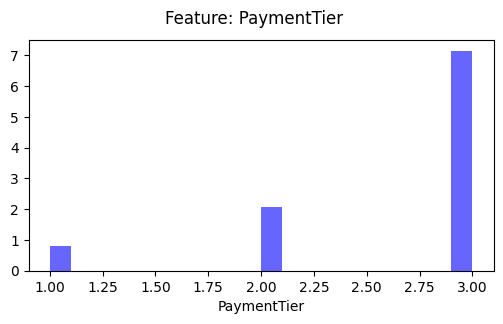

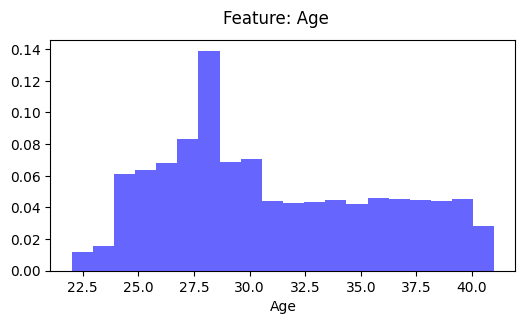

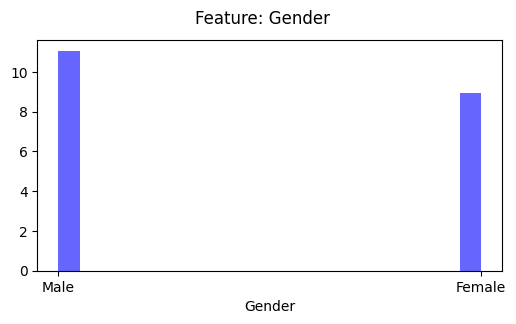

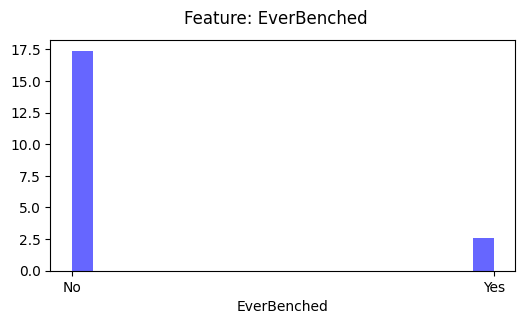

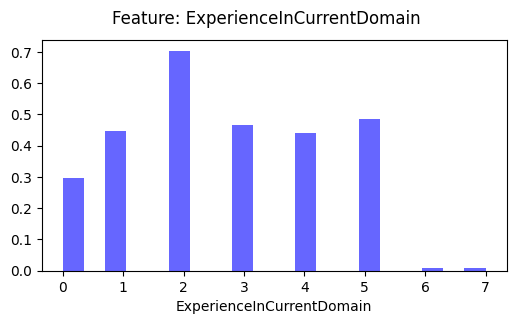

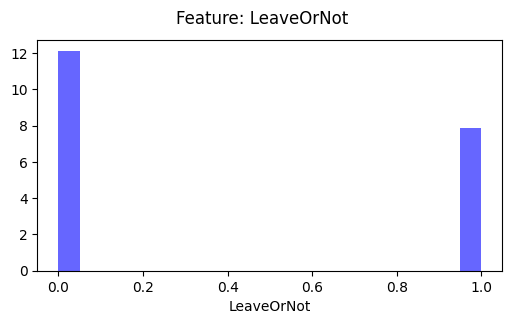

In [40]:
## Plotting histogram for each feature
for column in Employee_data.columns:
    fig, axis1 = plt.subplots(1, 1, figsize=(6,3))

    axis1.hist(Employee_data[column], bins=20, density=True, alpha=0.6, color='b')
    axis1.set_xlabel(column)
    plt.suptitle(f"Feature: {column}")
    plt.show()

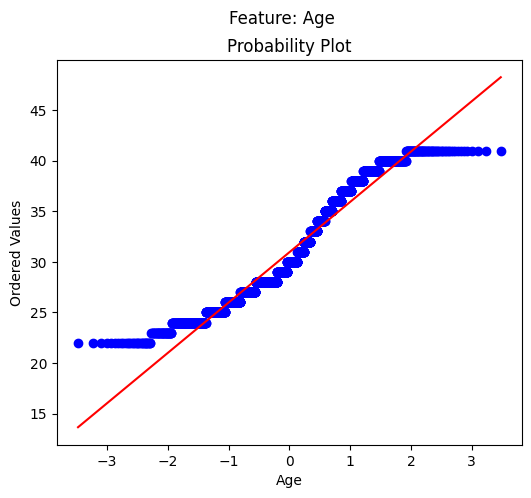

In [41]:
#Plotting Q-Q plots
fig, axis1 = plt.subplots(1, 1, figsize=(6,5))
stats.probplot(Employee_data['Age'], dist="norm", plot=axis1)
axis1.set_xlabel('Age')
plt.suptitle(f"Feature: Age")
plt.show()

In [42]:
Employee_data['Age']

0       34
1       28
2       38
3       27
4       24
        ..
4645    31
4647    30
4649    37
4650    27
4651    30
Name: Age, Length: 2764, dtype: int64

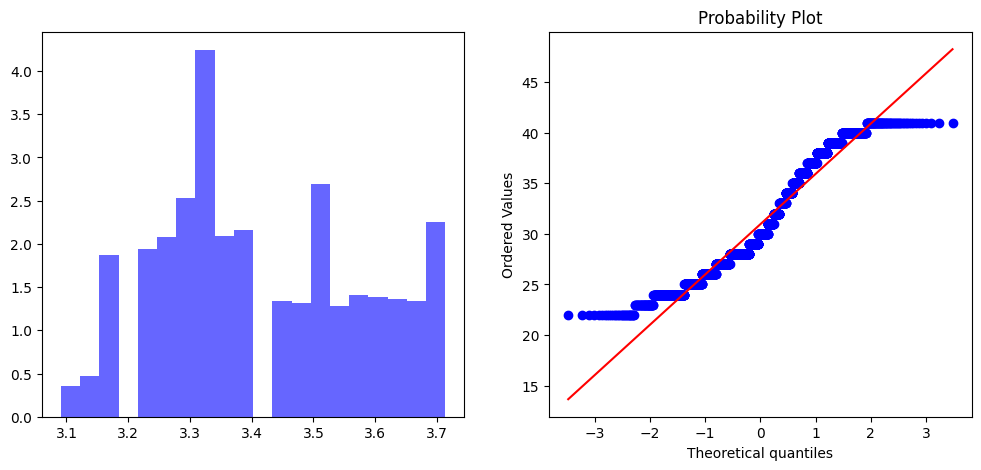

0       34
1       28
2       38
3       27
4       24
        ..
4645    31
4647    30
4649    37
4650    27
4651    30
Name: Age, Length: 2764, dtype: int64

In [43]:
## Apply a log transformation to the 'Age' column
age = np.log(Employee_data['Age'])
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(12,5))
axis1.hist(age, bins=20, density=True, alpha=0.6, color='b')
stats.probplot(Employee_data['Age'], dist="norm", plot=axis2)
plt.show()
Employee_data['Age']

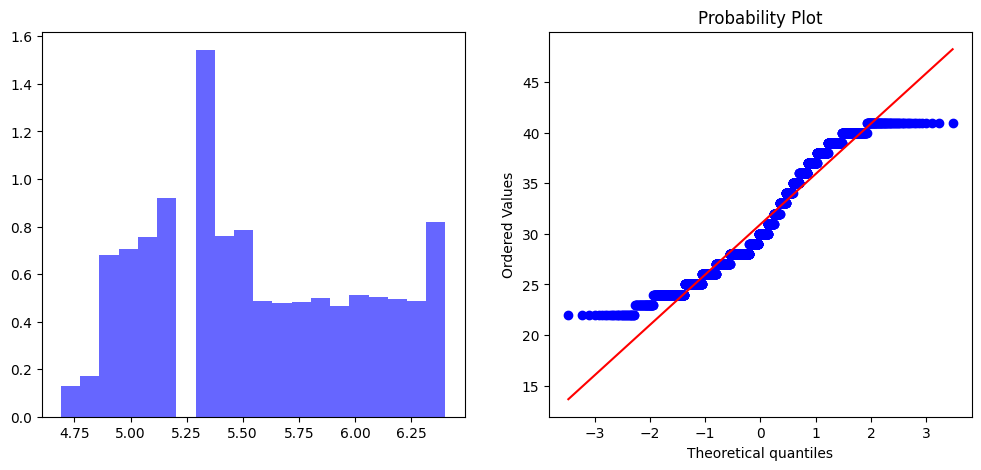

0       34
1       28
2       38
3       27
4       24
        ..
4645    31
4647    30
4649    37
4650    27
4651    30
Name: Age, Length: 2764, dtype: int64

In [44]:
## Apply square root transformation to the 'Age' column
age = np.sqrt(Employee_data['Age'])
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(12,5))
axis1.hist(age, bins=20, density=True, alpha=0.6, color='b')
stats.probplot(Employee_data['Age'], dist="norm", plot=axis2)
plt.show()
Employee_data['Age']

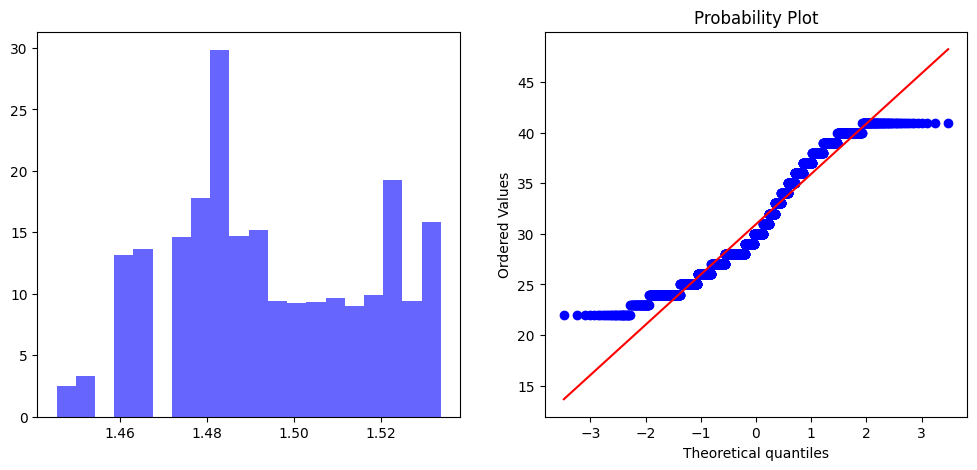

0       34
1       28
2       38
3       27
4       24
        ..
4645    31
4647    30
4649    37
4650    27
4651    30
Name: Age, Length: 2764, dtype: int64

In [45]:
## Apply square root transformation to the 'Age' column
age,_= stats.boxcox(Employee_data['Age'])
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(12,5))
axis1.hist(age, bins=20, density=True, alpha=0.6, color='b')
stats.probplot(Employee_data['Age'], dist="norm", plot=axis2)
plt.show()
Employee_data['Age']

In [46]:
## One hot encoding
Employee_data = pd.get_dummies(Employee_data, columns=['Gender','EverBenched'])

## Label encoding
Education_mapping = {
    'Bachelors' : 0,
    'Masters':1,
    'PHD':2
}

Employee_data['Education'] = Employee_data['Education'].map(Education_mapping)
Employee_data

,Education,JoiningYear,City,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,0,2017,Bangalore,3,34,0,0,0,1,1,0
1,0,2013,Pune,1,28,3,1,1,0,1,0
2,0,2014,New Delhi,3,38,2,0,1,0,1,0
3,1,2016,Bangalore,3,27,5,1,0,1,1,0
4,1,2017,Pune,3,24,2,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4645,1,2017,Pune,2,31,2,0,1,0,1,0
4647,0,2016,Pune,3,30,2,0,0,1,1,0
4649,1,2013,Pune,2,37,2,1,0,1,1,0
4650,1,2018,New Delhi,3,27,5,1,0,1,1,0
